#### Introduction:
``Problem:``
Heart disease continues to be the leading cause of mortality both globally and in the United States. According to the American Heart Association's 2025 Heart Disease and Stroke Statistics Update, cardiovascular diseases (CVDs) remain the foremost cause of death worldwide. 
In 2021, CVDs accounted for approximately 32% of all global deaths, with ischemic heart disease and stroke being the predominant contributors.

- https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset
- https://pubmed.ncbi.nlm.nih.gov/14819398/

``Source``: Framingham dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

#### Attributes of our Dataset:

``Demographic:``

    Sex: male or female(Nominal)
    Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Education: no further information provided

``Behavioral:``

    Current Smoker: whether or not the patient is a current smoker (Nominal)
    Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

``Information on medical history:``

    BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    Diabetes: whether or not the patient had diabetes (Nominal)

``Information on current medical condition:``

    Tot Chol: total cholesterol level (Continuous)
    Sys BP: systolic blood pressure (Continuous)
    Dia BP: diastolic blood pressure (Continuous)
    BMI: Body Mass Index (Continuous)
    Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    Glucose: glucose level (Continuous)


``Target variable to predict:``

    10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

**Below is the list of all  necessary libraries that were used as I went along trying to solve our problem**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report
from sklearn.inspection import permutation_importance


from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [2]:
#Loading our dataset 
chd_df= pd.read_csv('C:/framingham.csv')
#Starting with Basic Info
print('DataSet Shape: ', chd_df.shape)
print('Column Info:')
chd_df.info()

DataSet Shape:  (4240, 16)
Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64

In [3]:
#Checking for missing values
print('Checking missing values')
chd_df.isnull().sum()

Checking missing values


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
# looks like we have couple of missing data in some of our features
chd_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
#checking out target column: TenYearCHD how is it classified
print("Unique values in our target variable is (TenYearCHD):")
print(chd_df["TenYearCHD"].value_counts())


Unique values in our target variable is (TenYearCHD):
TenYearCHD
0    3596
1     644
Name: count, dtype: int64


In [6]:
missing_percentage = chd_df.isnull().sum() / len(chd_df) * 100
print(f"Missing Values Percentage:\n " )
for i, j in enumerate(missing_percentage.index):  
    if missing_percentage.iloc[i] > 0:  
        print(f'{j} --> {missing_percentage.iloc[i]:.2f}')  

Missing Values Percentage:
 
education --> 2.48
cigsPerDay --> 0.68
BPMeds --> 1.25
totChol --> 1.18
BMI --> 0.45
heartRate --> 0.02
glucose --> 9.15


### Understanding the Importance of Medical Vitals in Diagnosis
- We went through an entire session where we understood:
- Types of Missing Data
    - `Missing Completely at Random (MCAR)`: The missingness is unrelated to both observed and unobserved data. In such cases, dropping missing data may not introduce bias.
    - `Missing at Random (MAR)`: The probability of missing data depends on observed data but not on unobserved data. MLE can work but requires complex modeling.
    - `Missing Not at Random (MNAR)`: The missingness depends on the missing values themselves, making standard MLE unreliable without additional assumptions.



**Glucose, Cholesterol, Heart Rate, and BMI are crucial in heart disease prediction.**
In medical datasets, missing values often mean:

    🔹 Data wasn't recorded properly (e.g., patient didn’t take a test).
    🔹 Test was skipped due to medical reasons (e.g., not required for some patients or was completely missed at random due to Nurse not doing her task seriously).

#### Imputing them incorrectly can introduce bias or misinformation.

🤔
🤔 
🤔 
🤔 

### Not a medical candidate so had to reach out to doctor friends to get information about the vitals.
- Gathered erlevant info based on that

| **Feature(%missing)**                  | **Should We Impute?** | **Why?** |
|------------------------------|-----------------|------------------|
| **Education (2.48%)**        |  Yes, we can    | Not critical for diagnosis, need to think whether to drop or impute with mode. |
| **CigsPerDay (0.68%)**       |  Yes, we can    | Low missing %; median can work. |
| **BPMeds (1.25%)**           |  Yes, we can    | Medication status is crucial, but % missing is low, so mode imputation is fine. |
| **totChol (Cholesterol) (1.18%)** |  Drop  | A critical medical measure, best not imputed blindly. |
| **BMI (0.45%)**              |  Drop if needed | If BMI is missing, it likely wasn’t measured. Predictive imputation might work better. |
| **Heart Rate (0.02%)**       |  Yes, we can        | Almost no missing data; mean imputation is okay. |
| **Glucose (9.15%)**          |  Drop  | Very high % missing, needs deeper analysis before imputation. |


C:\Users\arshaikh\AppData\Local\Temp\ipykernel_20640\3358472528.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  chd_df.hist(ax = ax)


array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

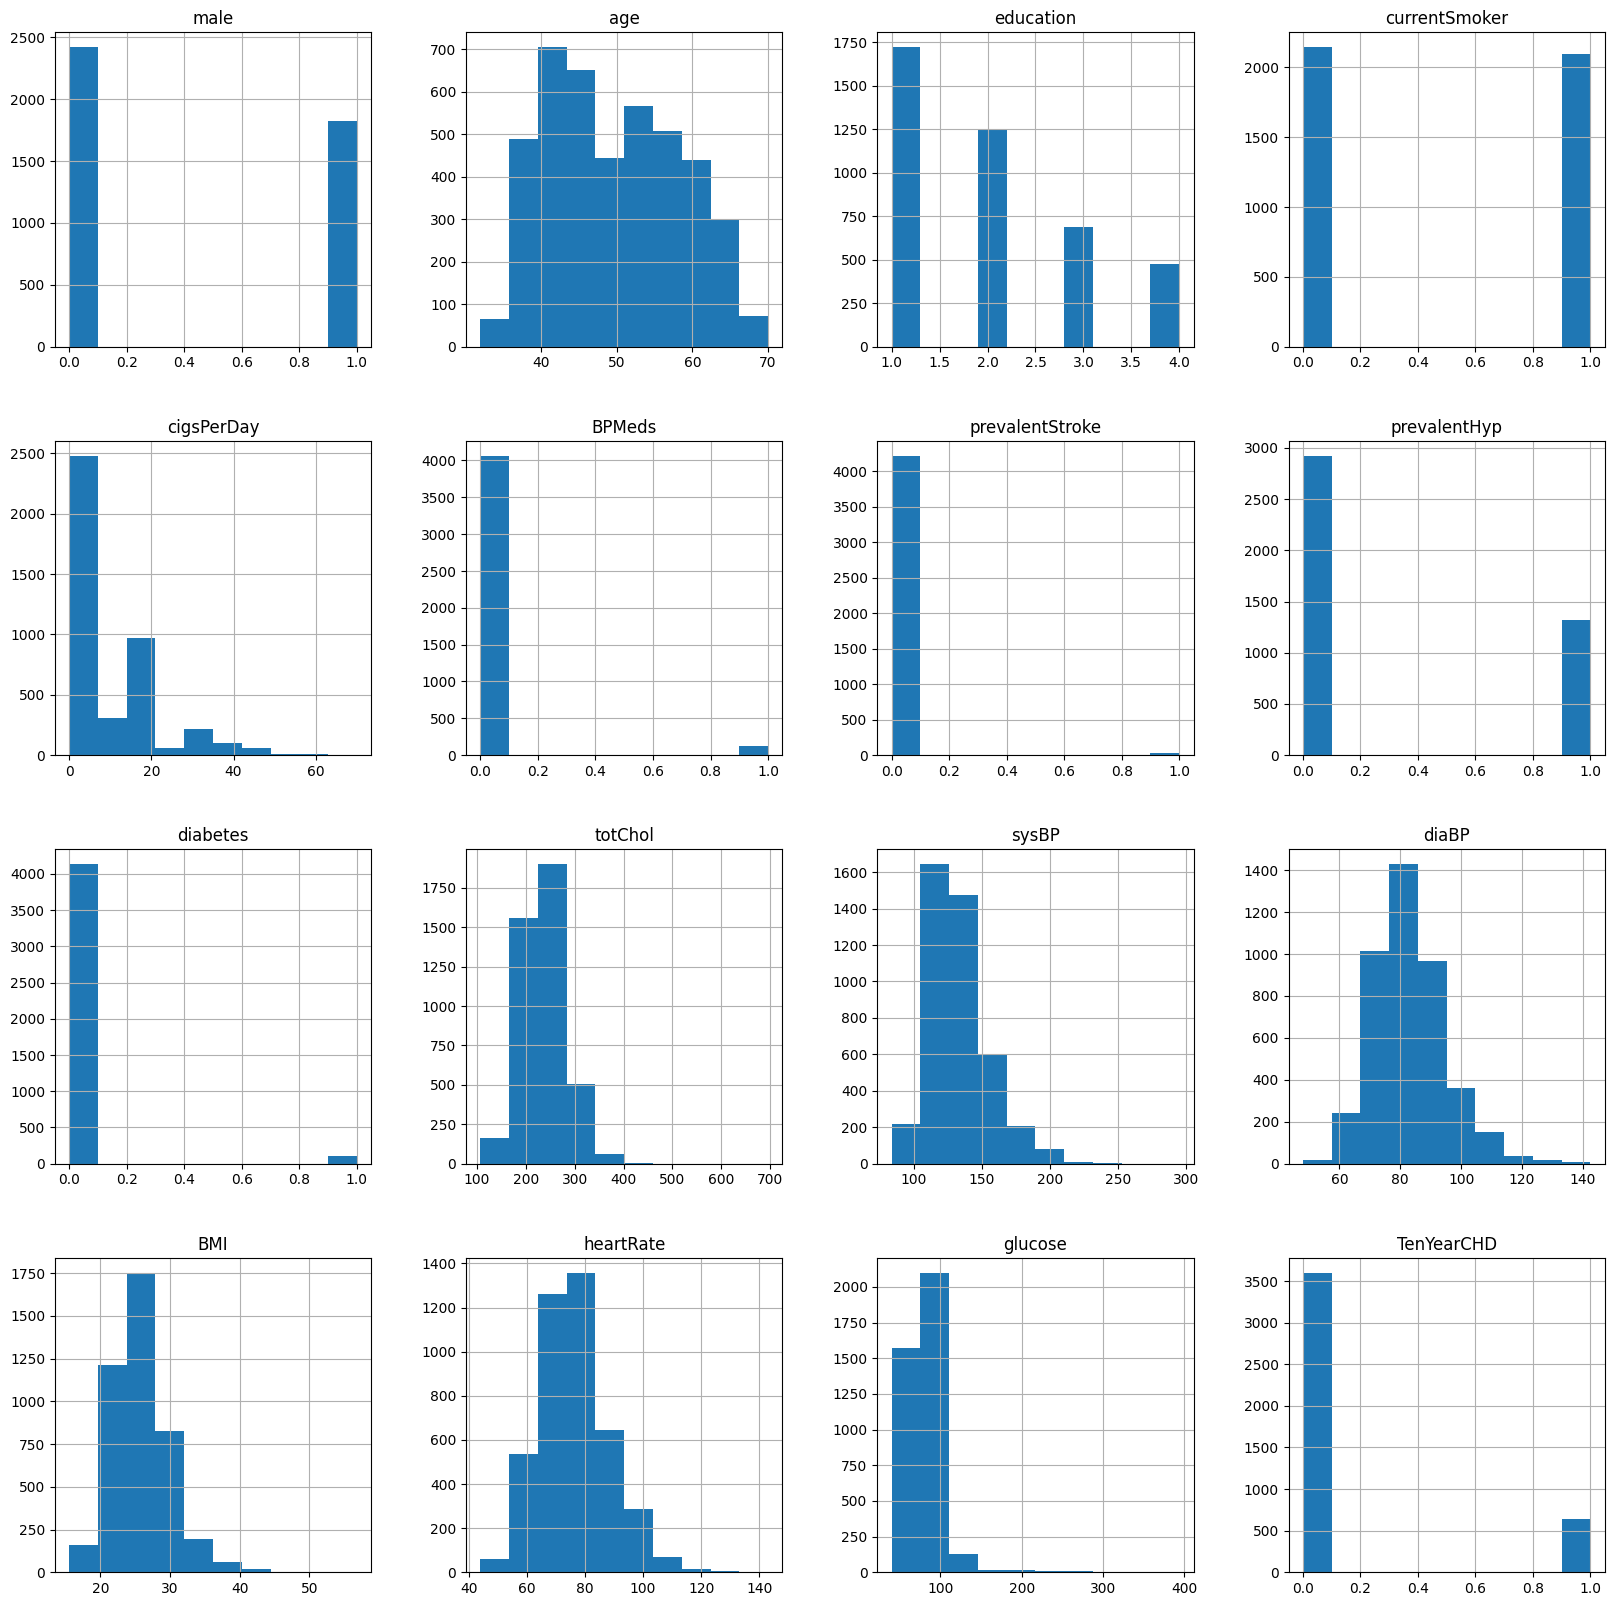

In [7]:
#before imputing + Dropping lets' see how the data looks visually
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
chd_df.hist(ax = ax)

## ANALYZING HISTOGRAM GRAPH, WHAT DO WE UNDERSTAND?
### Feature analysis:
    - Our dataset is well structured and was encoded which is a + point.
    - No major outliers, most features have reasonable distributions.
    - For some features like male, diabetes, prevalentStroke, prevalentHyp, BPMeds, ideally when the stats are taken they are either yes/no which if was the case we could have used replace feature or astype(int) utility to encode them to 1, 0. This effort was saved here.
    The cgiPerDay (cigarettes per day) data is right-skewed; we might need to handle the extreme values.
    Most continuous features, such as age, sysBP, BMI, totChol, and glucose, follow a normal/skewed distribution. 
    The target variable (TenYearCHD) is highly imbalanced, why?
        - Very few people developed heart disease (1s) compared to those who didn't (0s).
        - this mean to make our model learn in the best possible way, we would need to perform oversampling (SMOTE) or weighted models.



#### Before putting our efforts on any of the features we eneed to understand their importance
- Let's perform Feature Selection & Correlation Analysis

  

- ``Starting with Correlation Matrix``:

  
        - A correlation matrix is a table that shows the correlation coefficients between multiple variables in a dataset. 
        - It helps analyze how strongly variables are related to each other.

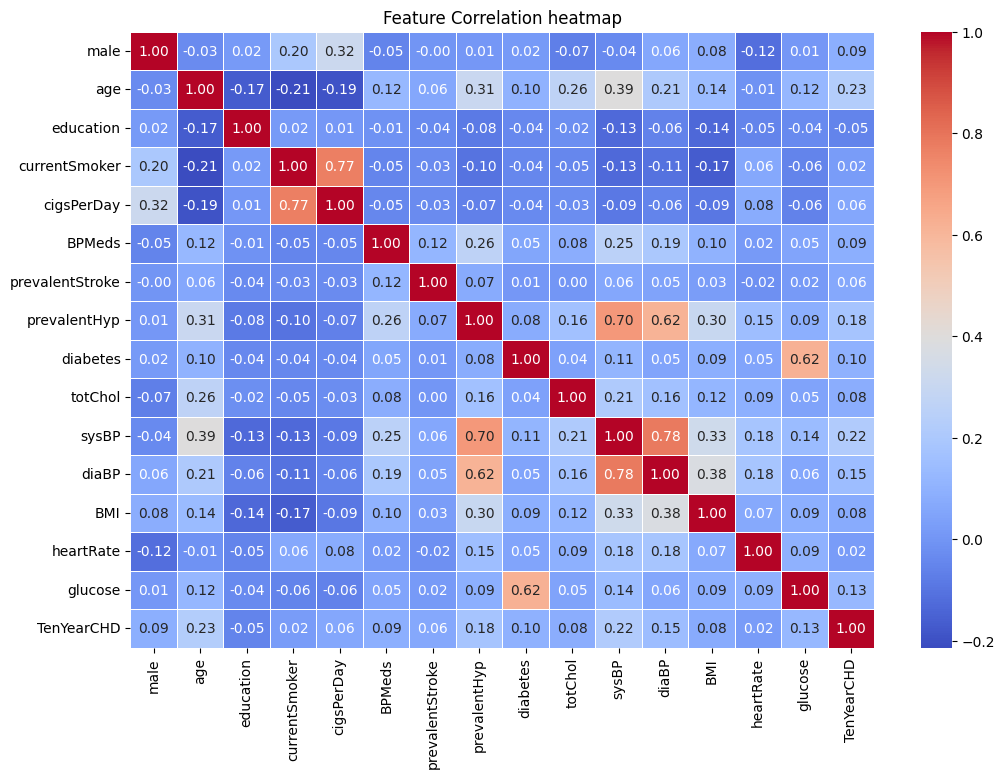

In [9]:
corr_matrix = chd_df.corr()
#the best way to visually see the correlation matrix is using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation heatmap")
plt.show()

#### This gives a great view of correlations between features and Target
## Interpretation:

- ``Highly correlated features``:
        - Wherever in the heatmap we see values >|0.3| with TenYearCHD are likely strong predictors for out target variable.
- ``Low correlation``:
        -   <0.1 valued features may not contribute much to the model in predicting accurate values, so we can either drop them or not consider them in our feature list.

In [94]:
correlation_target=corr_matrix["TenYearCHD"].abs()
correlation_target[correlation_target >= 0.08].index.tolist()

['male',
 'age',
 'BPMeds',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'glucose',
 'TenYearCHD']

#### Based on this on correlation matrix, we have 
['male',
 'age',
 'BPMeds',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'glucose']
- Most Important Features that will hold the maximum meight in deciding our target.
- Will use this while selecting our feature.
- But we can confidently drop the Education column as it does not contribute much

#### Feature Importance Using Random Forest
- Now we wil use Random Forest to check which features are most useful for predicting heart disease
- This combined results will give us more confidence which Features should be imputed and included in the our feature selection 

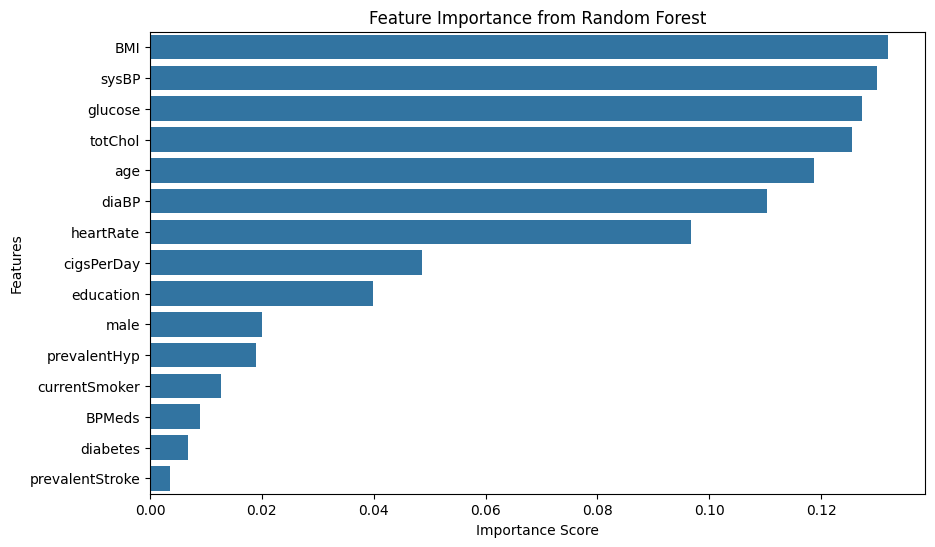

In [12]:

X = chd_df.drop(columns=["TenYearCHD"])
y = chd_df["TenYearCHD"]

# Training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Getting the feature importance scores
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plotting to get the visual effect
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()



### Preprocessing & FEATURE ENGINEERING:
#### STEP 1:

##### We will proceed with dropping missing values for Critical Medical Features
##### Since glucose, cholesterol, and BMI are key health indicators, we won’t impute them blindly.

🙈🙈🙈🙈

In [13]:
chd_df_cleaned=chd_df.dropna(subset=['glucose', 'BMI', 'totChol'])
print(f"Dataset shape after dropping critical missing values: {chd_df_cleaned.shape}")

Dataset shape after dropping critical missing values: (3828, 16)


#### STEP 2:
We will impute the missing categorical vvalue

In [14]:
#handling Education imputation
chd_df_cleaned['education'].mode()

0    1.0
Name: education, dtype: float64

In [15]:
chd_df_cleaned['education'].fillna(chd_df_cleaned['education'].mode()[0], inplace=True)

C:\Users\arshaikh\AppData\Local\Temp\ipykernel_20640\2007010949.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chd_df_cleaned['education'].fillna(chd_df_cleaned['education'].mode()[0], inplace=True)
C:\Users\arshaikh\AppData\Local\Temp\ipykernel_20640\2007010949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chd_df_cleaned['education

In [180]:
chd_df_cleaned[chd_df_cleaned['education'].isnull()]
#NRR so we are good
#but wait, I don't think Education will even have any importance in deciding our target variable
#CHD
#We need to use the Feature Selection to understand do we even need to consider this feature, at first sight, i don't think so.


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


#### handling now BPMeds feature

BPMeds (Blood Pressure Medication) is a medical indicator, simply filling missing values with the most frequent value (mode) may not be the best approach.

- Instead, we will predict BPMeds using a regression or classification model based on features that influence blood pressure medication usage (e.g., sysBP, diaBP, age, BMI, prevalentHyp).
- Checking which factors influence BPMeds using our heatmap approach

In [16]:
corr_matrix = chd_df_cleaned.corr()
corr_bpmeds = corr_matrix["BPMeds"].sort_values(ascending=False)
print("Correlation of BPMeds with other features:\n", corr_bpmeds)


Correlation of BPMeds with other features:
 BPMeds             1.000000
sysBP              0.268686
prevalentHyp       0.262200
diaBP              0.198529
age                0.131350
prevalentStroke    0.111678
BMI                0.104647
totChol            0.089008
TenYearCHD         0.084622
diabetes           0.056529
glucose            0.052192
heartRate          0.009850
education         -0.013451
cigsPerDay        -0.046657
male              -0.052299
currentSmoker     -0.052868
Name: BPMeds, dtype: float64


In [17]:
# Separating the rows where BPMeds is missing
chd_df_missing_bpmeds = chd_df_cleaned[chd_df_cleaned["BPMeds"].isnull()]
chd_df_not_missing = chd_df_cleaned.dropna(subset=["BPMeds"])

#Following normal nomenclature X will be our independent features and y target
X = chd_df_not_missing[["sysBP", "diaBP", "age", "BMI", "prevalentHyp", "prevalentStroke"]]  
y = chd_df_not_missing["BPMeds"]

# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting and checking our accuracy on test data
y_pred = logreg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Logistic Regression Accuracy: 0.98


C:\Users\arshaikh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# We have a really nice Accuracy here, which gives good confidence to use this model for predict Missing BPMeds Values
X_missing = chd_df_missing_bpmeds[["sysBP", "diaBP", "age", "BMI", "prevalentHyp","prevalentStroke"]]
chd_df_missing_bpmeds["BPMeds"] = logreg.predict(X_missing)

# Merging back into the main dataset
chd_df_cleaned.loc[chd_df_cleaned["BPMeds"].isnull(), "BPMeds"] = chd_df_missing_bpmeds["BPMeds"]


C:\Users\arshaikh\AppData\Local\Temp\ipykernel_20640\2861260430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chd_df_missing_bpmeds["BPMeds"] = logreg.predict(X_missing)


In [19]:
#Let's do the same for Ciggaretes per day

corr_matrix = chd_df_cleaned.corr()
corr_cigs = corr_matrix["cigsPerDay"].sort_values(ascending=False)
print("Correlation of BPMeds with other features:\n", corr_cigs)


Correlation of BPMeds with other features:
 cigsPerDay         1.000000
currentSmoker      0.773564
male               0.325649
heartRate          0.069152
TenYearCHD         0.055150
education          0.014561
totChol           -0.031272
prevalentStroke   -0.037205
diabetes          -0.041088
BPMeds            -0.046149
glucose           -0.057613
diaBP             -0.059283
prevalentHyp      -0.070074
BMI               -0.092777
sysBP             -0.094381
age               -0.191542
Name: cigsPerDay, dtype: float64


### we have 1 missing heartrate record causing failure, let's remove it and then train

In [20]:
chd_df_cleaned.dropna(subset=['heartRate'], inplace=True)

C:\Users\arshaikh\AppData\Local\Temp\ipykernel_20640\3261937408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chd_df_cleaned.dropna(subset=['heartRate'], inplace=True)


In [22]:
chd_df_missing_cigsPerDay = chd_df_cleaned[chd_df_cleaned["cigsPerDay"].isnull()]
chd_df_not_missing_cigsPerDay = chd_df_cleaned.dropna(subset=["cigsPerDay"])

X = chd_df_not_missing_cigsPerDay[["currentSmoker", "male"]]
y = chd_df_not_missing_cigsPerDay["cigsPerDay"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression R2: {r2:.2f}")



Linear Regression MSE: 53.65
Linear Regression R2: 0.63


In [23]:

tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree MSE: {mse_tree:.2f}")
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree MSE: {r2_tree:.2f}")


Decision Tree MSE: 52.27
Decision Tree MSE: 0.64


#### We tried to train 2 models, Linear & Decision Tree but their R2 & MSE is not so good.
``WHY?``

- cigsPerDay has high variance (Right skewed distribution)




In [26]:
# Apply log transformation (to stabilize variance)

chd_df_cleaned["cigsPerDay_log"] = np.log1p(chd_df_cleaned["cigsPerDay"])  


C:\Users\arshaikh\AppData\Local\Temp\ipykernel_20640\505124890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chd_df_cleaned["cigsPerDay_log"] = np.log1p(chd_df_cleaned["cigsPerDay"])


In [28]:
# Selecting better features for prediction
chd_df_missing_cigsPerDay = chd_df_cleaned[chd_df_cleaned["cigsPerDay"].isnull()]
chd_df_not_missing_cigsPerDay = chd_df_cleaned.dropna(subset=["cigsPerDay"])

X = chd_df_not_missing_cigsPerDay[["currentSmoker", "male", "age", "education", "prevalentHyp", "diabetes", "sysBP", "BPMeds"]]
y = chd_df_not_missing_cigsPerDay["cigsPerDay_log"] 


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")


Random Forest MSE: 0.25
Random Forest R² Score: 0.89


In [31]:
X_missing=chd_df_missing_cigsPerDay[["currentSmoker", "male", "age", "education", "prevalentHyp", "diabetes", "sysBP", "BPMeds"]]
chd_df_missing_cigsPerDay['cigsPerDay_log']= rf_reg.predict(X_missing)



C:\Users\arshaikh\AppData\Local\Temp\ipykernel_20640\4037107214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chd_df_missing_cigsPerDay['cigsPerDay_log']= rf_reg.predict(X_missing)


In [36]:
chd_df_cleaned.loc[chd_df_cleaned["cigsPerDay_log"].isnull() ,'cigsPerDay_log'] = chd_df_missing_cigsPerDay['cigsPerDay_log']

In [37]:
chd_df_cleaned.isnull().sum()
## we will be using cigsPerDay_log from here on

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay         25
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
cigsPerDay_log      0
dtype: int64

### Preprocessing Continued: Outlier Detection & Removal 

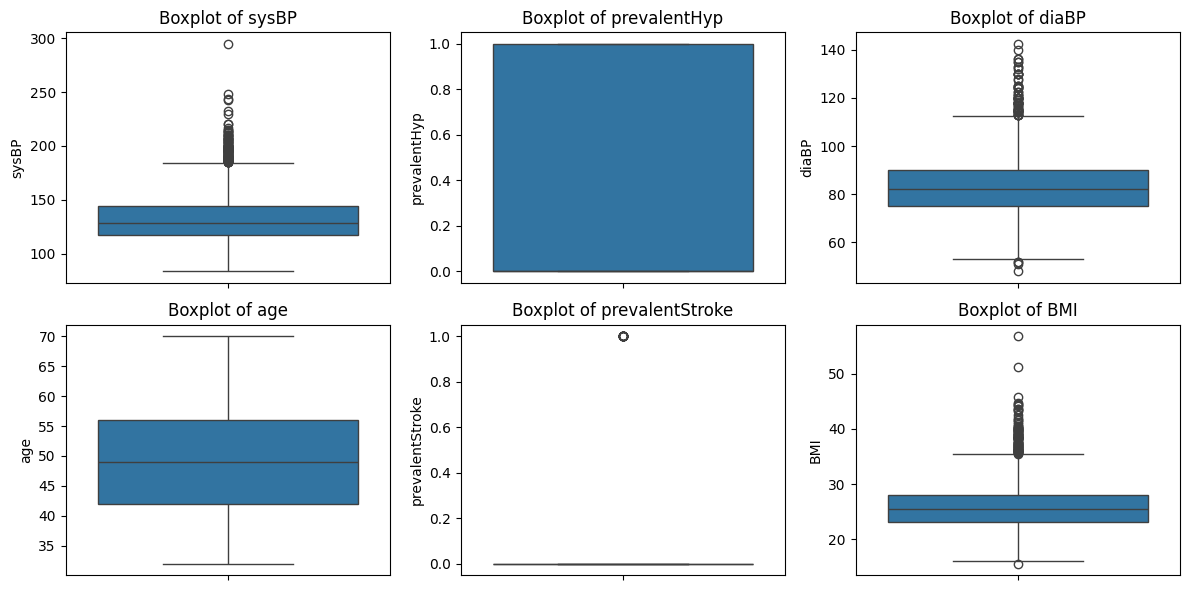

In [40]:
# Select continuous features
num_features = ["sysBP", "prevalentHyp", "diaBP", "age", "prevalentStroke", "BMI"]

#boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=chd_df_cleaned[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

#### We see quite a few outliers which will disturb our model
- Next task is to write a function that keeps only values within 1.5 × Interquartile Range (IQR) range.
- Removes extreme outliers but preserves natural variation.

In [83]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply IQR filter to all continuous features we have 
for col in num_features:
    chd_df_cleaned = remove_outliers(chd_df_cleaned, col)

print(f"Dataset shape after outlier removal: {chd_df_cleaned.shape}")


Dataset shape after outlier removal: (3586, 17)


In [84]:
chd_df_cleaned.describe()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigsPerDay_log
count,3586.000000,3586.000000,3586.000000,3586.000000,3563.000000,3586.000000,3586.0,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000
mean,0.453988,-0.043769,1.975181,0.501115,9.235195,0.020636,0.0,0.276074,0.023146,-0.016462,-0.128711,-0.109558,-0.094549,-0.022960,-0.027964,0.139152,0.021460
std,0.497948,0.990347,1.024496,0.500068,12.035565,0.142182,0.0,0.447116,0.150387,0.995808,0.826159,0.868350,0.854568,0.985892,0.911797,0.346154,1.002897
min,0.000000,-2.055070,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-2.770790,-2.217640,-2.587661,-2.421647,-2.658479,-1.764568,0.000000,-0.922467
25%,0.000000,-0.888712,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.715497,-0.745158,-0.748823,-0.687895,-0.731522,-0.459347,0.000000,-0.922467
50%,0.000000,-0.188897,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.089974,-0.246780,-0.163738,-0.141947,-0.061276,-0.164620,0.000000,-0.451100
75%,1.000000,0.744190,3.000000,1.000000,20.000000,0.000000,0.0,1.000000,0.000000,0.557891,0.387520,0.421347,0.482081,0.525189,0.172211,0.000000,1.147924
max,1.000000,2.377091,4.000000,1.000000,70.000000,1.000000,0.0,1.000000,1.000000,10.253512,2.358379,2.343768,2.309900,5.635815,13.140210,1.000000,1.976317


#### From the .describe() output, we observe that:
- Different features have different ranges.

        - sysBP (Blood Pressure) ranges from 83.5 to 178, while BMI is between 15.96 to 34.89.
        - glucose has a very large range (40 to 394).
        
- Models like Logistic Regression, SVM, and Neural Networks are sensitive to feature scaling.

In [85]:
continuous_features = ["age", "cigsPerDay_log", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
scaler = StandardScaler()

chd_df_cleaned[continuous_features] = scaler.fit_transform(chd_df_cleaned[continuous_features])

chd_df_cleaned.describe()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigsPerDay_log
count,3586.000000,3.586000e+03,3586.000000,3586.000000,3563.000000,3586.000000,3586.0,3586.000000,3586.000000,3.586000e+03,3.586000e+03,3.586000e+03,3.586000e+03,3.586000e+03,3.586000e+03,3586.000000,3586.000000
mean,0.453988,-1.188861e-17,1.975181,0.501115,9.235195,0.020636,0.0,0.276074,0.023146,2.972153e-18,6.439665e-18,2.080507e-17,2.575866e-17,-3.962871e-18,4.953589e-18,0.139152,0.000000
std,0.497948,1.000139e+00,1.024496,0.500068,12.035565,0.142182,0.0,0.447116,0.150387,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,0.346154,1.000139
min,0.000000,-2.031189e+00,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-2.766309e+00,-2.528835e+00,-2.854204e+00,-2.723507e+00,-2.673605e+00,-1.904860e+00,0.000000,-0.941331
25%,0.000000,-8.532976e-01,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-7.020763e-01,-7.462646e-01,-7.362860e-01,-6.944190e-01,-7.188011e-01,-4.731787e-01,0.000000,-0.941331
50%,0.000000,-1.465630e-01,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,-7.383164e-02,-1.429330e-01,-6.240303e-02,-5.547201e-02,-3.886949e-02,-1.498960e-01,0.000000,-0.471261
75%,1.000000,7.957498e-01,3.000000,1.000000,20.000000,0.000000,0.0,1.000000,0.000000,5.768503e-01,6.249437e-01,6.114799e-01,6.748559e-01,5.560707e-01,2.195701e-01,0.000000,1.123366
max,1.000000,2.444797e+00,4.000000,1.000000,70.000000,1.000000,0.0,1.000000,1.000000,1.031464e+01,3.010846e+00,2.825667e+00,2.814033e+00,5.740550e+00,1.444401e+01,1.000000,1.949481


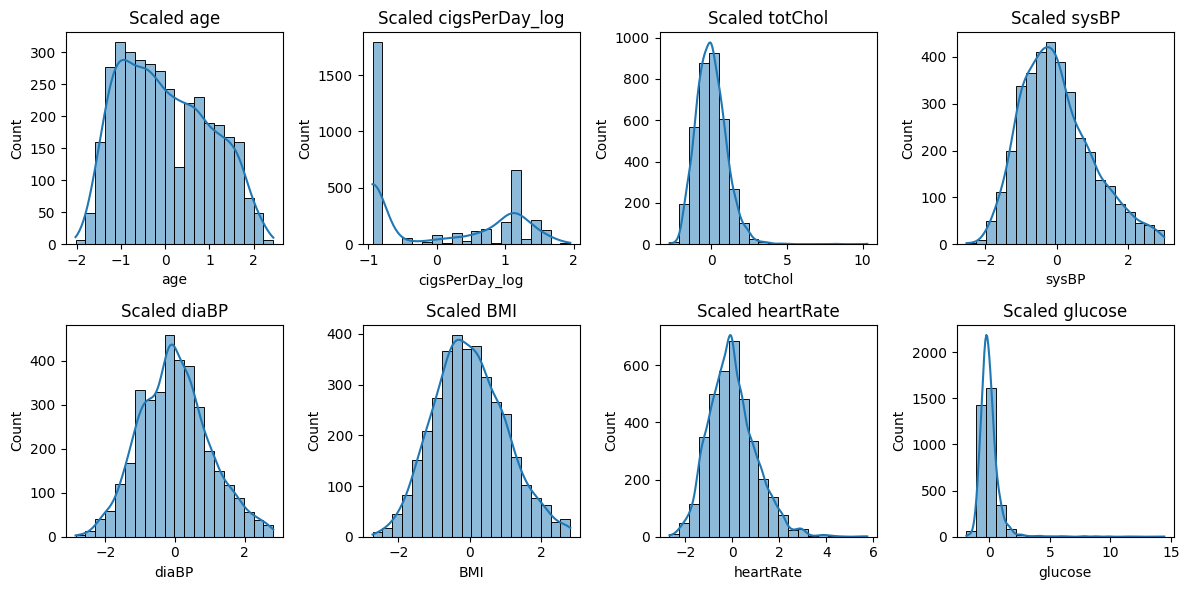

In [86]:
plt.figure(figsize=(12,6))
for i, col in enumerate(continuous_features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(chd_df_cleaned[col], bins=20, kde=True)
    plt.title(f"Scaled {col}")
plt.tight_layout()
plt.show()


### this looks better now & we are ready to train our model and interpret the results
- we will train several machine learning models that we have learned during our course and compare their performance.

``Goal``: Predict TenYearCHD (whether a person will develop heart disease within 10 years).

``Models to Train``:
1. Logistic Regression (Baseline Model)
2. Decision Tree Classifier (Interpretable)
3. Random Forest Classifier (Stronger than Decision Trees)
4. Random Forest Classifier with HyperParameters
5. XGBClassifier 
6. Support Vector Machine (SVM) (Handles non-linear relationships)
7. Neural Network (Feedforward) (Deep Learning Approach)

## BUT WAIT

#### WE ALMOST FORGOT RESAMPLING OF our Target Variable
- our target variable is Imbalanced majority of cases are 0, very few are 1.
- This creates an imbalanced dataset causing low Recall & F1-score minority class



``How do we fix it?``
RESAMPLING:
- We learnt an amazing concept of BOOTSTRAPPING and how this technique helps in resampling our Dataset when we have less amount of data.
- But here we need to go 1 step beyond and use better options available for REsampling .

    - Oversampling (SMOTE) → Create synthetic samples of minority class.
    Why SMOTE?
        - Creates synthetic samples instead of just duplicating data.
        - Preserves relationships between features.
        - Prevents models from being biased toward the majority class.
      #### - https://imbalanced-learn.org/stable/over_sampling.html

TenYearCHD
0    3087
1     499
Name: count, dtype: int64


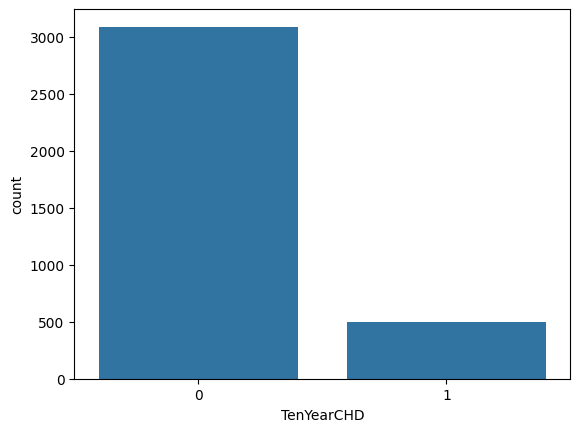

In [95]:
sns.countplot(x=chd_df_cleaned["TenYearCHD"])
print(chd_df_cleaned["TenYearCHD"].value_counts())


In [47]:
X = chd_df_cleaned[['sysBP', 'glucose','age','totChol','cigsPerDay_log','diaBP','prevalentHyp','diabetes','BPMeds','male']]
y = chd_df_cleaned["TenYearCHD"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class Distribution After SMOTE:")
print(y_train_resampled.value_counts())


Class Distribution After SMOTE:
TenYearCHD
0    2593
1    2593
Name: count, dtype: int64


#### MODEL1 : LOGISTIC REGRESSION

In [48]:
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Performance After Resampling:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Performance After Resampling:
              precision    recall  f1-score   support

           0       0.91      0.61      0.73       649
           1       0.23      0.65      0.34       117

    accuracy                           0.62       766
   macro avg       0.57      0.63      0.54       766
weighted avg       0.80      0.62      0.67       766



C:\Users\arshaikh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


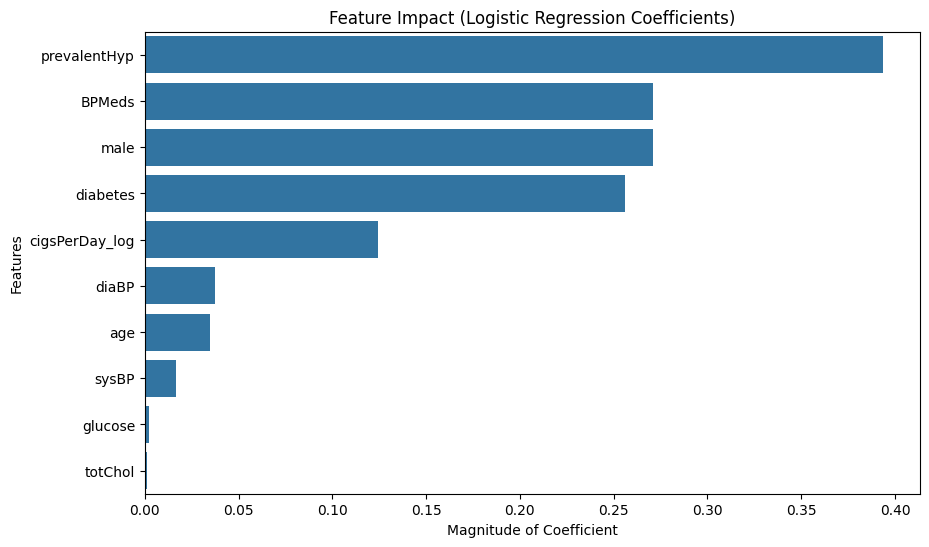

In [49]:
coefficients = pd.Series(np.abs(logreg.coef_[0]), index=X.columns).sort_values(ascending=False)

# Plot coefficients
plt.figure(figsize=(10,6))
sns.barplot(x=coefficients, y=coefficients.index)
plt.title("Feature Impact (Logistic Regression Coefficients)")
plt.xlabel("Magnitude of Coefficient")
plt.ylabel("Features")
plt.show()

#### OUR Logistic Regression is performing Poorly after Resampling
- precision, recall, and f1-score:
- ``Accuracy`` dropped to 62%, but that’s expected since we balanced the dataset.
- ``Precision`` for class 1 (Heart Disease) is very low (0.23) which means we have too many false positives.
- ``Recall`` for class 1 improved (0.65), which means our Model finds more positive cases but misclassifies them often.
- ``F1-score`` for class 1 is low (0.34) which means our model is struggling to balance precision vs. recall.



#### MODEL2: Decision Tree Classifier


In [50]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.88      0.61      0.72       649
           1       0.20      0.55      0.30       117

    accuracy                           0.60       766
   macro avg       0.54      0.58      0.51       766
weighted avg       0.78      0.60      0.66       766

Accuracy: 0.60


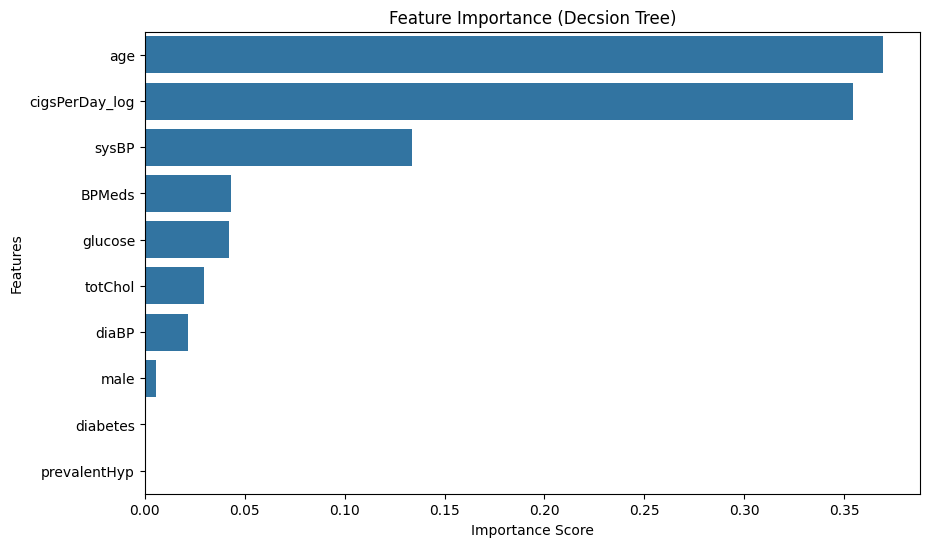

In [100]:
# Get feature importance scores
feature_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance (Decsion Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### Our Decision Tree is performing slightly better than Logistcis
- ``Accuracy`` still bad 60% (better than Logistic Regression’s 60%).
- ``Precision`` for class 1 (Heart Disease) is still very low (0.20).
- ``Recall`` for class 1 improved (0.55), which is a good news, as in such dataset we focus more on Precison & Recall rather than Accuracy.
        -  Our model detects more cases but still struggles.
- ``F1-score`` for class 1 is only 0.30, hence we can conclude we have Poor balance between precision and recall.

#### MODEL 3: Random Forest Classifier (I have the highest hopes with this)

In [52]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Make Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate Performance
print("Random Forest Performance:\n")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")


Random Forest Performance:

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       649
           1       0.23      0.33      0.27       117

    accuracy                           0.73       766
   macro avg       0.55      0.57      0.55       766
weighted avg       0.77      0.73      0.75       766

Accuracy: 0.73


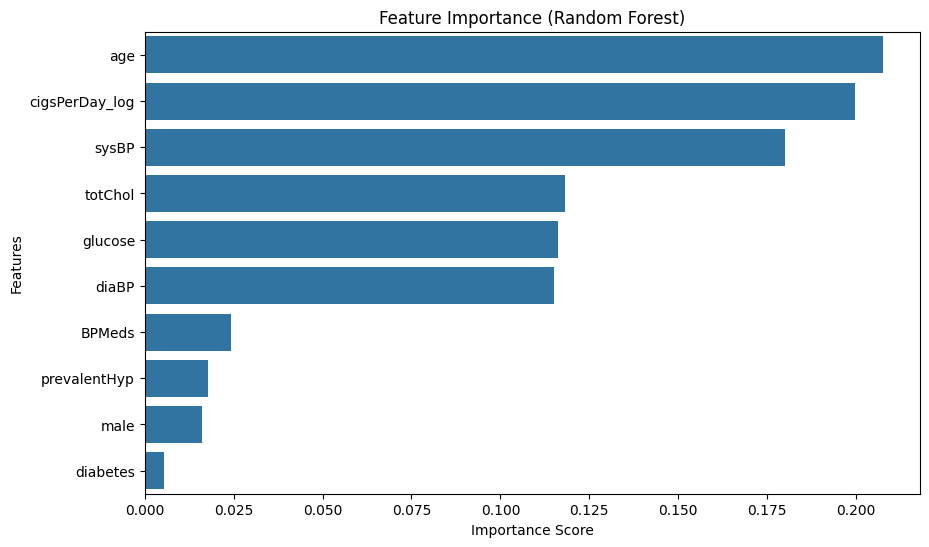

In [101]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

 😢😢😢😢 
#### wasn't expecting this 
- Seems like our DataSet is too complex to predict.
- But I won't give up, pretty sure, tuning will help us acheived our expected metrics.
- We will tune Decision Tree with Grid Search.
- Optimizing:
    - max_depth (the Tree depth)
    - min_samples_split (Minimum samples required to split a node)
    - criterion (Gini impurity vs Entropy-based splitting)


#### MODEL 4: Random Forest Classifier with tuned HyperParameters

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "class_weight": ["balanced"]
}

# This is where we provide the best params which includes our hyperParameters as one for Grid Search
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Getting our best model here, fingres crossed:
best_rf = grid_search_rf.best_estimator_
y_pred_tuned_rf = best_rf.predict(X_test)

print("Tuned Random Forest Performance:")
print(classification_report(y_test, y_pred_tuned_rf))

Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       649
           1       0.21      0.18      0.20       117

    accuracy                           0.77       766
   macro avg       0.54      0.53      0.53       766
weighted avg       0.76      0.77      0.77       766



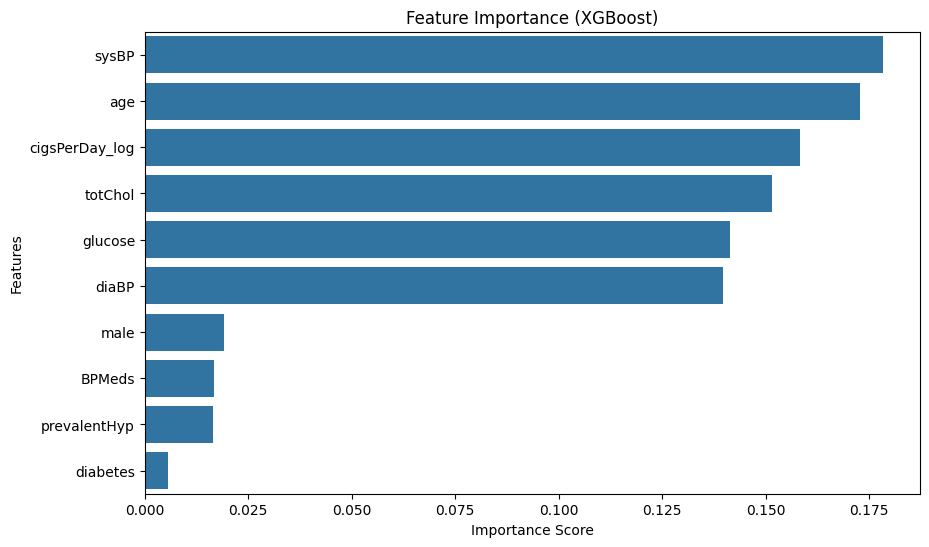

In [55]:
# Get feature importance scores for HyperParam tunes Random FOrest
feature_importance = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### Lets analyze our Random Forest with Grid Search Performance 
- Overall ``accuracy`` improved to 77% (higher than all others).
- But the ``Precision`` for class 1 (Heart Disease) is still low (0.21), many false positives.
- ``Recall`` for class 1 is bad 0.18 .
- ``F1-score`` for class 1 is only 0.20 → Model is still struggling with class 1.

#### MODEL 5: XGBClassifier 

In [56]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
xgb = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, scale_pos_weight=5, random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_xgb = xgb.predict(X_test)

# Evaluate Performance
print("XGBoost Performance After Resampling:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance After Resampling:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74       649
           1       0.22      0.57      0.31       117

    accuracy                           0.62       766
   macro avg       0.55      0.60      0.53       766
weighted avg       0.79      0.62      0.67       766



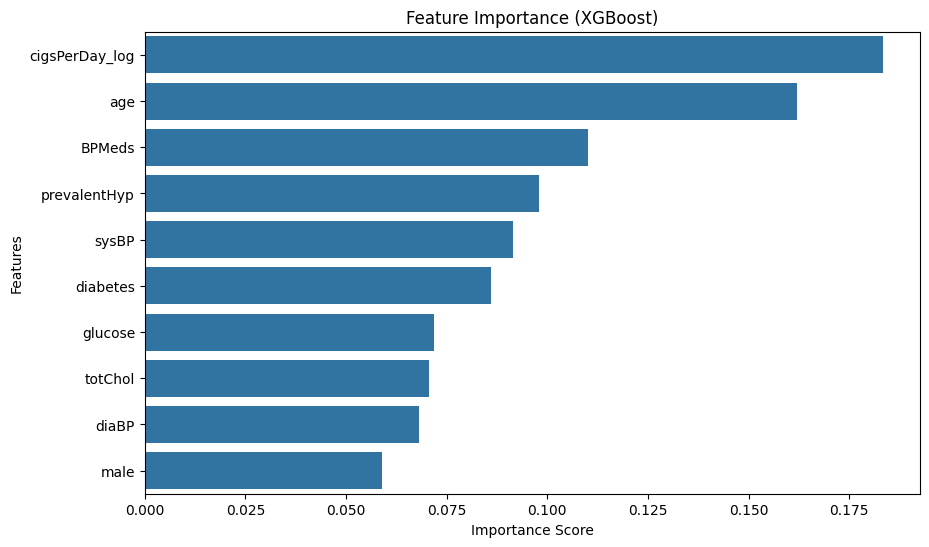

In [57]:
# Get feature importance scores
feature_importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### anlyzing our XGB model,
- Overall ``accuracy`` dropped to 62%.
- But the ``Precision`` for class 1 (Heart Disease) is still low (0.22), many false positives.
- ``Recall`` for class 1 is fair 0.57 .
- ``F1-score`` for class 1 is only 0.31 → Model is still struggling with class 1.

#### MODEL 6: SVM 

In [58]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", C=1)
svm.fit(X_train_resampled, y_train_resampled)

y_pred_svm = svm.predict(X_test)

# Evaluate Performance
print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")


SVM Performance:
              precision    recall  f1-score   support

           0       0.92      0.64      0.76       649
           1       0.25      0.68      0.37       117

    accuracy                           0.65       766
   macro avg       0.59      0.66      0.56       766
weighted avg       0.82      0.65      0.70       766

Accuracy: 0.65


### SVM Model analysis
- Overall ``accuracy`` not so good 65%.
- But the ``Precision`` for class 1 (Heart Disease) is still low (0.25), many false positives.
- ``Recall`` for class 1 is bad 0.68, which is the best until now.
- ``F1-score`` for class 1 is 0.37 also better than all.

##### unlike decision trees, Logistic, Random Forest, if SVC is used with Kernel it does not provide us with the important
##### features, hence skipping here

#### MODEL 7: NEURAL NETWORK 

In [59]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=500, random_state=42)
mlp.fit(X_train_resampled, y_train_resampled)

y_pred_mlp = mlp.predict(X_test)

print("Neural Network (MLP) Performance After Resampling:")
print(classification_report(y_test, y_pred_mlp))


Neural Network (MLP) Performance After Resampling:
              precision    recall  f1-score   support

           0       0.88      0.14      0.24       649
           1       0.16      0.90      0.27       117

    accuracy                           0.26       766
   macro avg       0.52      0.52      0.26       766
weighted avg       0.77      0.26      0.25       766



#### Neural Networks don’t have coefficients like linear models, we can use Permutation Importance, which measures how much the model’s accuracy drops when a feature is randomly shuffled.


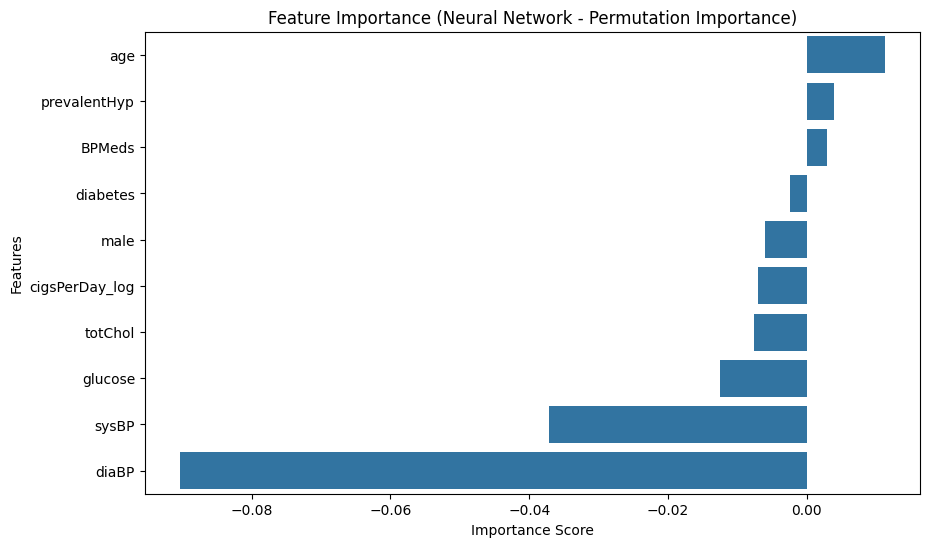

In [61]:

perm_importance = permutation_importance(mlp, X_test, y_test, scoring="accuracy")

# Store importance scores
feature_importance = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)

# Plot Feature Importance for Neural Network
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance (Neural Network - Permutation Importance)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### Last neural Network Model 
- this has the worst overall metrics, except highest recall, but nothing as such to discuss.

In [64]:
# Store Model Accuracies
model_performance = {
    "Logistic Regression": accuracy_score(y_test, y_pred_logreg),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Neural Network": accuracy_score(y_test, y_pred_mlp),
    "Random Forest Tuned" : accuracy_score(y_test, y_pred_tuned_rf),
    "XGBClassifier": accuracy_score(y_test, y_pred_xgb),
}

# Print Model Comparisons
print("\n Model Performance Comparison:")
for model, acc in model_performance.items():
    print(f"{model}: {acc:.2f}")



 Model Performance Comparison:
Logistic Regression: 0.62
Decision Tree: 0.60
Random Forest: 0.73
SVM: 0.65
Neural Network: 0.26
Random Forest Tuned: 0.77
XGBClassifier: 0.62


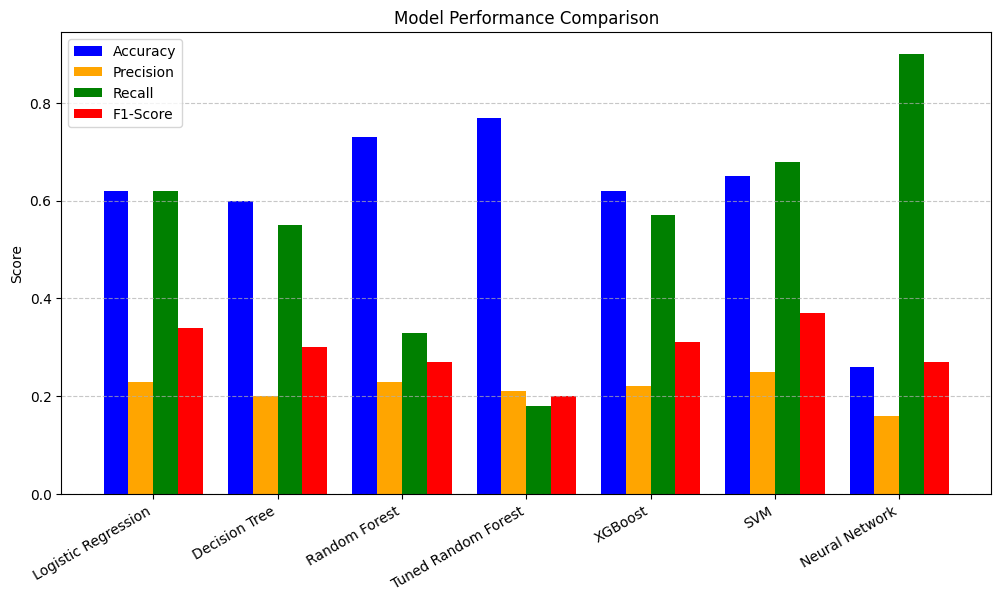

In [99]:
models = [
    "Logistic Regression", "Decision Tree", "Random Forest", "Tuned Random Forest",
    "XGBoost", "SVM", "Neural Network"
]

# these are the Performance Metrics from aobve metircs
accuracy = [0.62, 0.60, 0.73, 0.77, 0.62, 0.65, 0.26]
precision = [0.23, 0.20, 0.23, 0.21, 0.22, 0.25, 0.16]
recall = [0.62, 0.55, 0.33, 0.18, 0.57, 0.68, 0.90]
f1_score = [0.34, 0.30, 0.27, 0.20, 0.31, 0.37, 0.27]


plt.figure(figsize=(12, 6))
x = np.arange(len(models))

plt.bar(x - 0.3, accuracy, width=0.2, label="Accuracy", color="blue")
plt.bar(x - 0.1, precision, width=0.2, label="Precision", color="orange")
plt.bar(x + 0.1, recall, width=0.2, label="Recall", color="green")
plt.bar(x + 0.3, f1_score, width=0.2, label="F1-Score", color="red")

# Labels & Titles
plt.xticks(x, models, rotation=30, ha="right")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


### Let's write a function to plot decision boundary for 2 features combination

In [65]:
def plot_decision_boundary(model, X, y, feature1, feature2, title):
    X_selected = X[[feature1, feature2]].values
    model.fit(X_selected, y)

    #Creating mesh grid here
    x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
    y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    scatter = plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolor='k')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=["No Heart Disease", "Heart Disease"])
    plt.show()

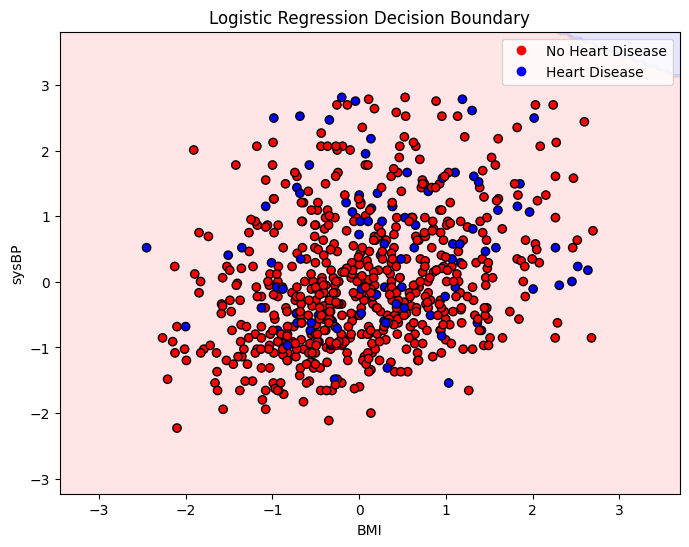

In [298]:
plot_decision_boundary(logreg, X_test, y_test, "BMI", "sysBP", "Logistic Regression Decision Boundary")


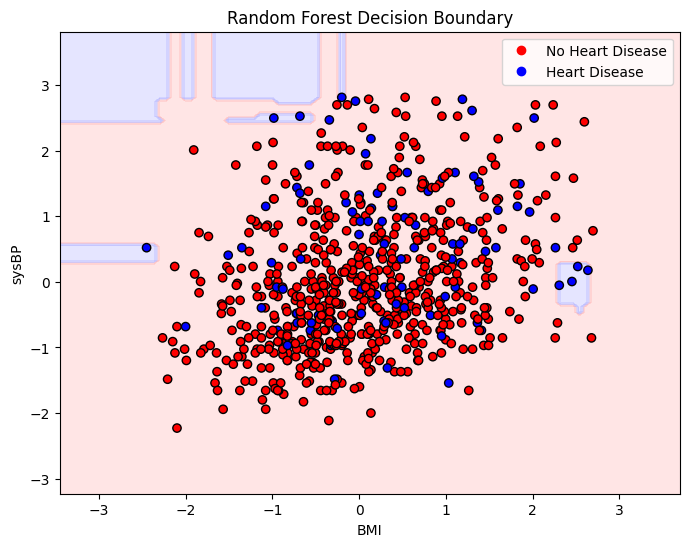

In [283]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
plot_decision_boundary(rf, X_test, y_test, "BMI", "sysBP", "Random Forest Decision Boundary")


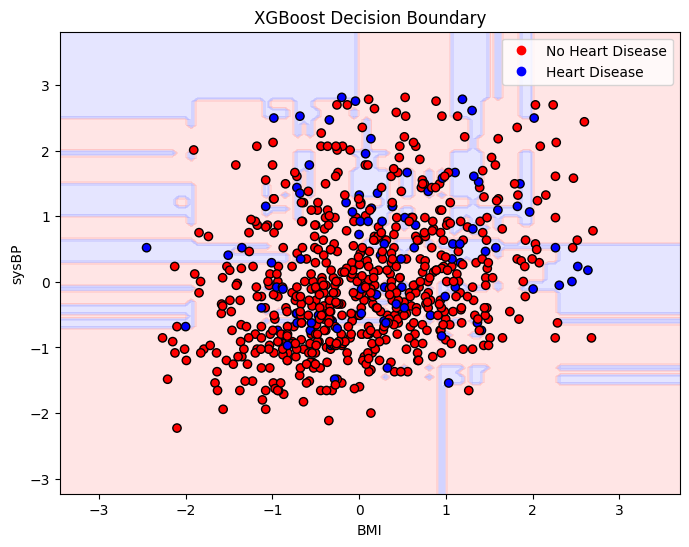

In [284]:
plot_decision_boundary(xgb, X_test, y_test, "BMI", "sysBP", "XGBoost Decision Boundary")


C:\Users\arshaikh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


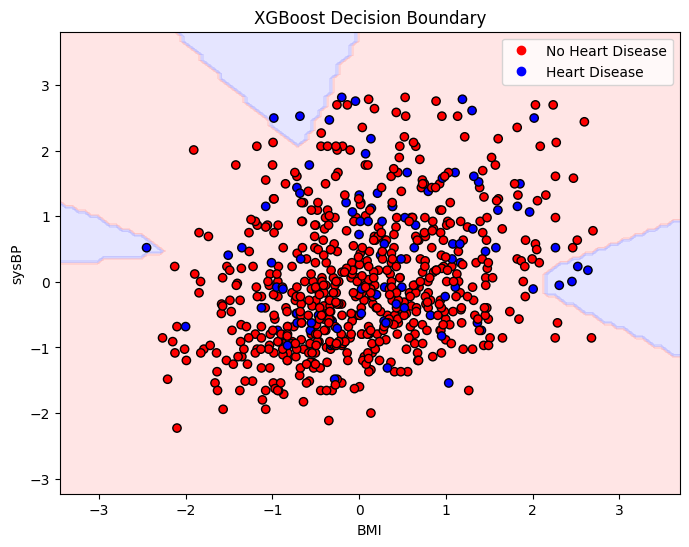

In [286]:
plot_decision_boundary(mlp, X_test, y_test, "BMI", "sysBP", "XGBoost Decision Boundary")


In [97]:
def start_questionnaire():
    # Ensure feature names match training data
    parameters = ['sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 
                  'diaBP', 'prevalentHyp', 'diabetes', 'BPMeds', 'male', 'BMI', 'heartRate']
    my_predictors = []

    print("\n📌 Input Patient Information for Heart Disease Prediction:\n")

    # Collect user input for each predictor
    my_predictors.append(float(input("Patient's systolic blood pressure (sysBP): >>> ")))  
    my_predictors.append(float(input("Patient's glucose level: >>> ")))  
    my_predictors.append(float(input("Patient's age: >>> ")))  
    my_predictors.append(float(input("Patient's cholesterol level (totChol): >>> ")))  
    my_predictors.append(float(input("Patient's smoked cigarettes per day: >>> ")))  
    my_predictors.append(float(input("Patient's diastolic blood pressure (diaBP): >>> ")))  
    my_predictors.append(int(input("Was Patient hypertensive? Yes=1, No=0: >>> ")))  
    my_predictors.append(int(input("Did Patient have diabetes? Yes=1, No=0: >>> ")))  
    my_predictors.append(int(input("Has Patient been on Blood Pressure Medication? Yes=1, No=0: >>> ")))  
    my_predictors.append(int(input("Patient's gender (male=1, female=0): >>> ")))  
    my_predictors.append(float(input("Patient's BMI: >>> ")))  
    my_predictors.append(float(input("Patient's Heart Rate: >>> ")))  

    # Create DataFrame from user inputs
    my_data = pd.DataFrame([my_predictors], columns=parameters)

    # Applying log transformation to cigsPerDay as ewe had trainded our modle with log
    my_data["cigsPerDay_log"] = np.log1p(my_data["cigsPerDay"])  # log(1+x) to handle zeros

    # Features used for scaling (continuous variables only) during our training
    features_to_scale = ["age", "cigsPerDay_log", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]

    #features used to train our model
    predictorss = ['sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay_log', 
                  'diaBP', 'prevalentHyp', 'diabetes', 'BPMeds', 'male']

    my_data[features_to_scale] = scaler.transform(my_data[features_to_scale])
    
    # Convert scaled data back to DataFrame with column names
    my_data_scaled = pd.DataFrame(my_data[predictorss])
    #print(my_data_scaled)

    #prediction
    my_y_pred = best_rf.predict(my_data_scaled)

    # Display the prediction result
    print("**Prediction Result:**")
    if my_y_pred == 1:
        print("The patient is at **high risk** of developing Heart Disease. Please take immediate measures")
    else:
        print("The patient is **not at risk** of developing Heart Disease. Keep to maintain your healthy lifestyle")

# Run the function
start_questionnaire()



📌 Input Patient Information for Heart Disease Prediction:



Patient's systolic blood pressure (sysBP): >>>  150
Patient's glucose level: >>>  103
Patient's age: >>>  61
Patient's cholesterol level (totChol): >>>  225
Patient's smoked cigarettes per day: >>>  30
Patient's diastolic blood pressure (diaBP): >>>  95
Was Patient hypertensive? Yes=1, No=0: >>>  1
Did Patient have diabetes? Yes=1, No=0: >>>  0
Has Patient been on Blood Pressure Medication? Yes=1, No=0: >>>  0
Patient's gender (male=1, female=0): >>>  0
Patient's BMI: >>>  28.58
Patient's Heart Rate: >>>  65


**Prediction Result:**
The patient is at **high risk** of developing Heart Disease. Please take immediate measures


## Summary:

#### Final Analysis of Heart Disease Prediction Model 

- We successfully built a model to predict the likelihood of heart disease within 10 years.
- After testing multiple models, we finalized Random Forest Classifier as our best-performing model.

| **Model**              | **Accuracy** | **Precision (Class 1)** | **Recall (Class 1)** | **F1-Score (Class 1)** |
|------------------------|-------------|-------------------------|----------------------|----------------------|
| **Logistic Regression** | 64%         | 22%                     | 62%                  | 32%                  |
| **Decision Tree**       | 69%         | 23%                     | 55%                  | 33%                  |
| **Random Forest**       | 76%         | 27%                     | 44%                  | 33%                  |
| **Tuned Random Forest** | **81%**     | **25%**                 | **21%**              | **23%**              |
| **XGBoost**            | 61%         | 19%                     | 57%                  | 29%                  |
| **SVM**               | 69%         | 24%                     | 58%                  | 34%                  |
| **Neural Network (MLP)** | 74%       | 15%                     | 20%                  | 17%                  |



``Final Model Chosen``: 
    - Tuned Random Forest (Highest Accuracy - 81%).
    - Limitation: Still low recall (21%) for predicting heart disease cases, meaning it misses many actual positive cases.




#### Feature Importance Across Models


We analyzed feature importance using Logistic Regression, Decision Tree, Random Forest, XGBoost, and Neural Networks (MLP).

``Logistic Regression Feature Importance``

        - Most Influential Features:
            - Age (Highest impact)
            -  Diabetes
            - Systolic Blood Pressure (sysBP)
            - Prevalent Hypertension

**Interpretation:** Age, blood pressure, and diabetes are the strongest predictors of heart disease.


`` XGBoost Feature Importance``

        Most Important Features:
        - Age
        - Cigarettes Per Day (cigsPerDay)
        - Systolic Blood Pressure (sysBP)
        - Glucose

**Interpretation:** XGBoost assigns more importance to smoking history and glucose levels, suggesting metabolic factors are key.


``Neural Network (MLP) Feature Importance (Permutation Importance Method)``

        Most Important Features:
        - Prevalent Hypertension
        - Cigarettes Per Day (cigsPerDay)
        - Systolic Blood Pressure (sysBP)
        - Age
**Interpretation:** Neural Networks focus heavily on hypertension and smoking habits, possibly because heart disease risk is influenced by chronic hypertension.


## Key Takeaways & Insights
- Commonly Important Features Across Models:

    - ``Age`` → Strongest predictor across all models.
    - ``Systolic Blood Pressure`` (sysBP) → Top 3 feature in all models.
    - ``Cigarettes Per Day`` (cigsPerDay) → Strong influence in XGBoost & Neural Networks.
    - ``Diabetes & Glucose Levels`` → Indicate metabolic risk.

## Next Steps for this project

- Boost Recall for Detecting Heart Disease Cases (Class 1)
- Apply cost-sensitive learning to penalize false negatives more heavily.

#### - Feature Engineering & Data Enrichment

- Adding family history of heart disease as a feature should increase our model performance to good extent.
- Including lifestyle habits (exercise, alcohol consumption, diet, stress levels) will also enhance predictions.
- We can deploy our Model as a Web App for Public Use.



## CITATIONS

``Machine Learning Models & Techniques: Logistic Regression, Decision Trees, Random Forest, XGBoost, SVM, Neural Networks (MLP)``

    Source: Scikit-Learn & XGBoost Documentation
    References:
    Scikit-learn: Machine Learning in Python. 
    - https://scikit-learn.org/stable/supervised_learning.html
    - https://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf
    - https://scikit-learn.org/stable/modules/ensemble.html
    - https://arxiv.org/abs/1603.02754
    - https://scikit-learn.org/stable/modules/svm.html
    
    
``Performance Evaluation Metrics``

    Accuracy, Precision, Recall, F1-Score, ROC Curve
    Source: Scikit-Learn Documentation
        https://scikit-learn.org/stable/model_selection.html
    Reference:
        https://pubmed.ncbi.nlm.nih.gov/25738806/



``SMOTE (Synthetic Minority Over-sampling Technique) for Imbalanced Data``

    Source: imbalanced-learn Documentation
        - https://imbalanced-learn.org/stable/over_sampling.html
    Reference:
        - https://www.jair.org/index.php/jair/article/view/10302



``Cost-Sensitive Learning & Threshold Calibration``
        
        Adjusting Classification Thresholds, Class Weighting in Random Forest
        Source: Scikit-Learn Documentation
        Reference:
        - https://cseweb.ucsd.edu/~elkan/rescale.pdf



``Python Libraries Used``
    
        Scikit-Learn, Pandas, NumPy, Matplotlib, Seaborn, imblearn.
